#### Problem Statement

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/Hrushikesh/Desktop/DSData-master/Telecom_customer_churn.csv")

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


These dataset contains the detail of customer in which both numerical and categorical data are present. Here Churn is the target variable which contains two categories so it will be termed as a classification problem

In [4]:
data.shape

(7043, 21)

This dataset contains 7043 rows and 21 columns. Out of which one is target variable

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

The dataset contains Int, float and object type of data

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values present in the dataset

<AxesSubplot:>

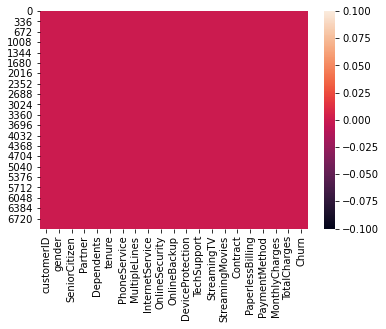

In [7]:
sns.heatmap(data.isnull())

As we can see by visualization there are no null values present in the columns

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

6766-HFKLA    1
9067-SQTNS    1
1641-BYBTK    1
0871-OPBXW    1
7020-OZKXZ    1
             ..
4713-ZBURT    1
2135-DQWAQ    1
9497-QCMMS    1
4950-HKQTE    1
1842-EZJMK    1
Name: customerID, Length: 7043, dtype: int64


Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No         

These are the value counts of all columns and we can see blank in TotalCharges columns. Lets check out the unique value of that column

In [10]:
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
# CHecking the spacee in Totalcharges column
data.loc[data['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


As we find that TotalCharges column has space as values but it was showing 0 missing values in this columns. Lets deal with it

In [12]:
data['TotalCharges']=data['TotalCharges'].replace(" ",np.nan)
data['TotalCharges'].value_counts()

20.2       11
19.75       9
19.9        8
19.65       8
20.05       8
           ..
362.2       1
1820.45     1
3503.5      1
955.6       1
67.55       1
Name: TotalCharges, Length: 6530, dtype: int64

In [13]:
#Converting object datatype to float datatype
data['TotalCharges'] = data['TotalCharges'].astype(float)
data['TotalCharges'].dtype

dtype('float64')

In [14]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we have filled the blank spaces with nan values in total charges, it's showing 11 null values in that column. Replacing the NAN values using mean method as the data has a continuous values


In [15]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

<AxesSubplot:>

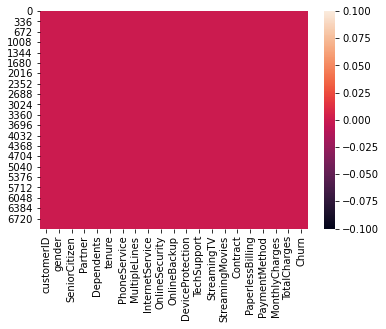

In [16]:
sns.heatmap(data.isnull())

 we  confirm from visualization that there are no null values in the total charges column


In [17]:
# Checking for Categirical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [18]:
# Checking for Numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [19]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

These are the unique value present in the dataset. Here customer ID column has the data of unique ID which has no use for predicting the model so we can drop this column


In [20]:
data.drop('customerID',axis=1,inplace=True)

In [21]:
# Checking the count of counts of target 
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

These are the two categories present in at Target column namely yes and no


In [22]:
# Checking the unique values in target columns
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

We can assume that no stands for customers who have not churned and yes stands for the customer who have got churned from the company


In [23]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


This gives the statistical information of the numerical data

- The count of all the columns are same which means there are no missing value present in the dataset

- The mean value is greater than median in tenure and total charges column which means the data is skewed to right in this columns

- The data in the column monthly charges has mean value less than median which means the data is skewed to left

- We can observe that there are huge difference between 75 percentile and Max hence there are outliers present in the data



# Data Visualization

No     5174
Yes    1869
Name: Churn, dtype: int64


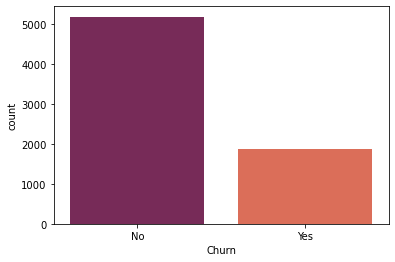

In [24]:
print(data['Churn'].value_counts())
sns.countplot(data['Churn'],palette="rocket")
plt.show()

We can observe that the count of no are high compared to count of yes that if there are more number of customers who have not churned. This leads to class imbalance issue in the data.


Male      3555
Female    3488
Name: gender, dtype: int64


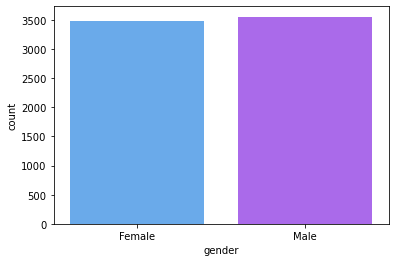

In [25]:
print(data['gender'].value_counts())
sns.countplot(data['gender'],palette="cool")
plt.show()

It is clear from the visualization that the total number of males and females are almost same

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


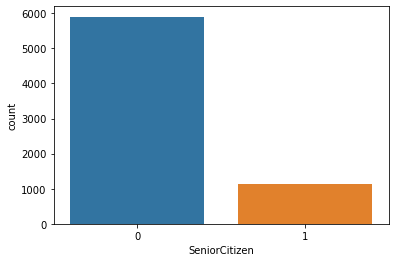

In [26]:
print(data['SeniorCitizen'].value_counts())
sns.countplot(data['SeniorCitizen'])
plt.show()

Here 0 represents non senior citizen and one represents senior citizens. The count of 0 high as compared to count of 1 which means number of non senior citizens are quite high compared to senior citizens in data set


No     3641
Yes    3402
Name: Partner, dtype: int64


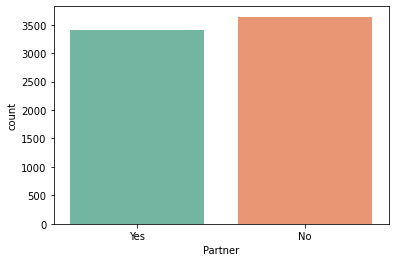

In [27]:
print(data['Partner'].value_counts())
sns.countplot(data['Partner'],palette='Set2')
plt.show()

No     4933
Yes    2110
Name: Dependents, dtype: int64


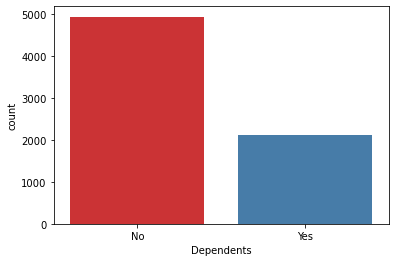

In [28]:
print(data['Dependents'].value_counts())
sns.countplot(data['Dependents'],palette='Set1')
plt.show()

The customer who have dependents earliest compared to customers who have not dependents

Yes    6361
No      682
Name: PhoneService, dtype: int64


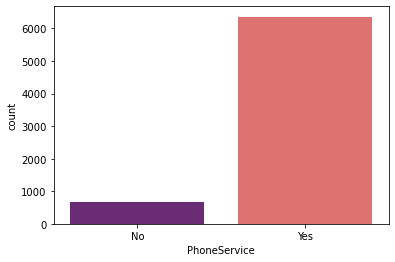

In [29]:
print(data['PhoneService'].value_counts())
sns.countplot(data['PhoneService'],palette='magma')
plt.show()

The customer who have phone services are large in numbers and who do not own phone services are very less in numbers

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


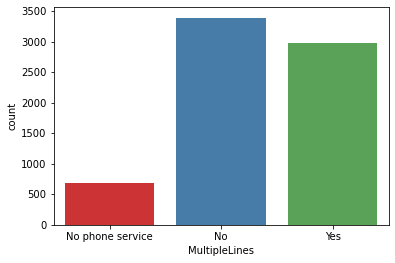

In [30]:
print(data['MultipleLines'].value_counts())
sns.countplot(data['MultipleLines'],palette='Set1')
plt.show()

The customer having phone services from single line have higher counts compared to customer having phone services from multiple lines, also customers who do not have phone services have covered very less data compared to others.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


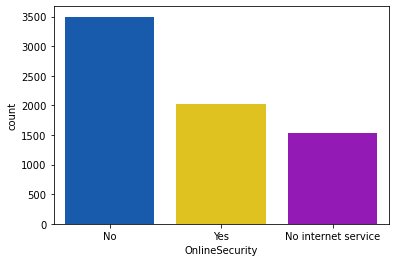

In [31]:
print(data['OnlineSecurity'].value_counts())
sns.countplot(data['OnlineSecurity'],palette='prism')
plt.show()

The customer is having  no Internet services needs online security and who do not own any Internet services they do not need any online security. But from the plot we can observe the majority of customers who have Internet services have low online security


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


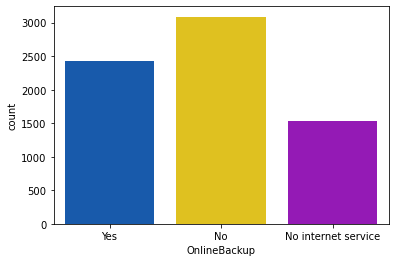

In [32]:
print(data['OnlineBackup'].value_counts())
sns.countplot(data['OnlineBackup'],palette='prism')
plt.show()

We can observe that the customers having no Internet services have very less online backup accounts compared to others

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


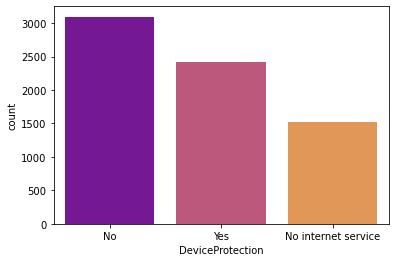

In [33]:
print(data['DeviceProtection'].value_counts())
sns.countplot(data['DeviceProtection'],palette='plasma')
plt.show()

We can see that the customers who do not have Internet access they do not need any on device production

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


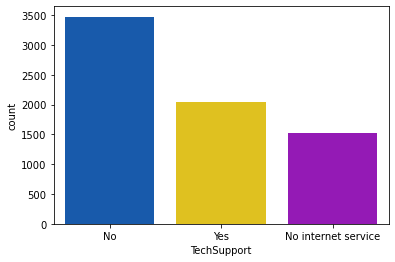

In [34]:
print(data['TechSupport'].value_counts())
sns.countplot(data['TechSupport'],palette='prism')
plt.show()

The customer who do not need any Technical Support or high in counts compared to the customer who need Technical Support

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


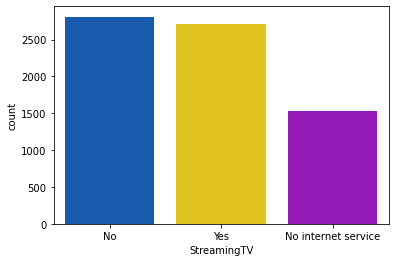

In [35]:
print(data['StreamingTV'].value_counts())
sns.countplot(data['StreamingTV'],palette='prism')
plt.show()

The customer who do not use streamingTV have little bit high Numbers than the customer who do use streaming TV. And the customer who do not own Internet they do not have this service much

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


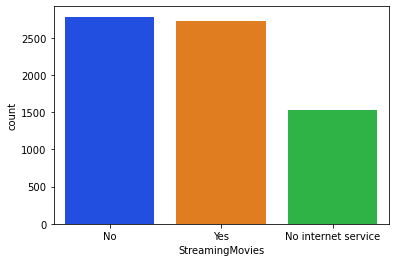

In [36]:
print(data['StreamingMovies'].value_counts())
sns.countplot(data['StreamingMovies'],palette='bright')
plt.show()

The customers who do not have streaming movies are high in count followed by the customer who has streaming movie services and the customers who do not have Internet services, they have less streaming movie services compared to others


Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


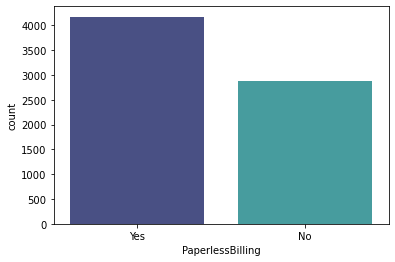

In [37]:
print(data['PaperlessBilling'].value_counts())
sns.countplot(data['PaperlessBilling'],palette='mako')
plt.show()

Most of the customer prefer paper billing and average number of customers who do not prefer paper less billing Dale may like to receive paper billing


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


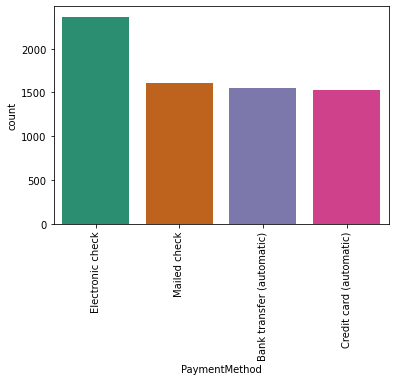

In [38]:
print(data['PaymentMethod'].value_counts())
sns.countplot(data['PaymentMethod'],palette='Dark2')
plt.xticks(rotation=90)
plt.show()

Most of the customer prefer electronic check payment method and the customer who prefer mail check bank transfer and credit card have average in count


# Distribution Plot

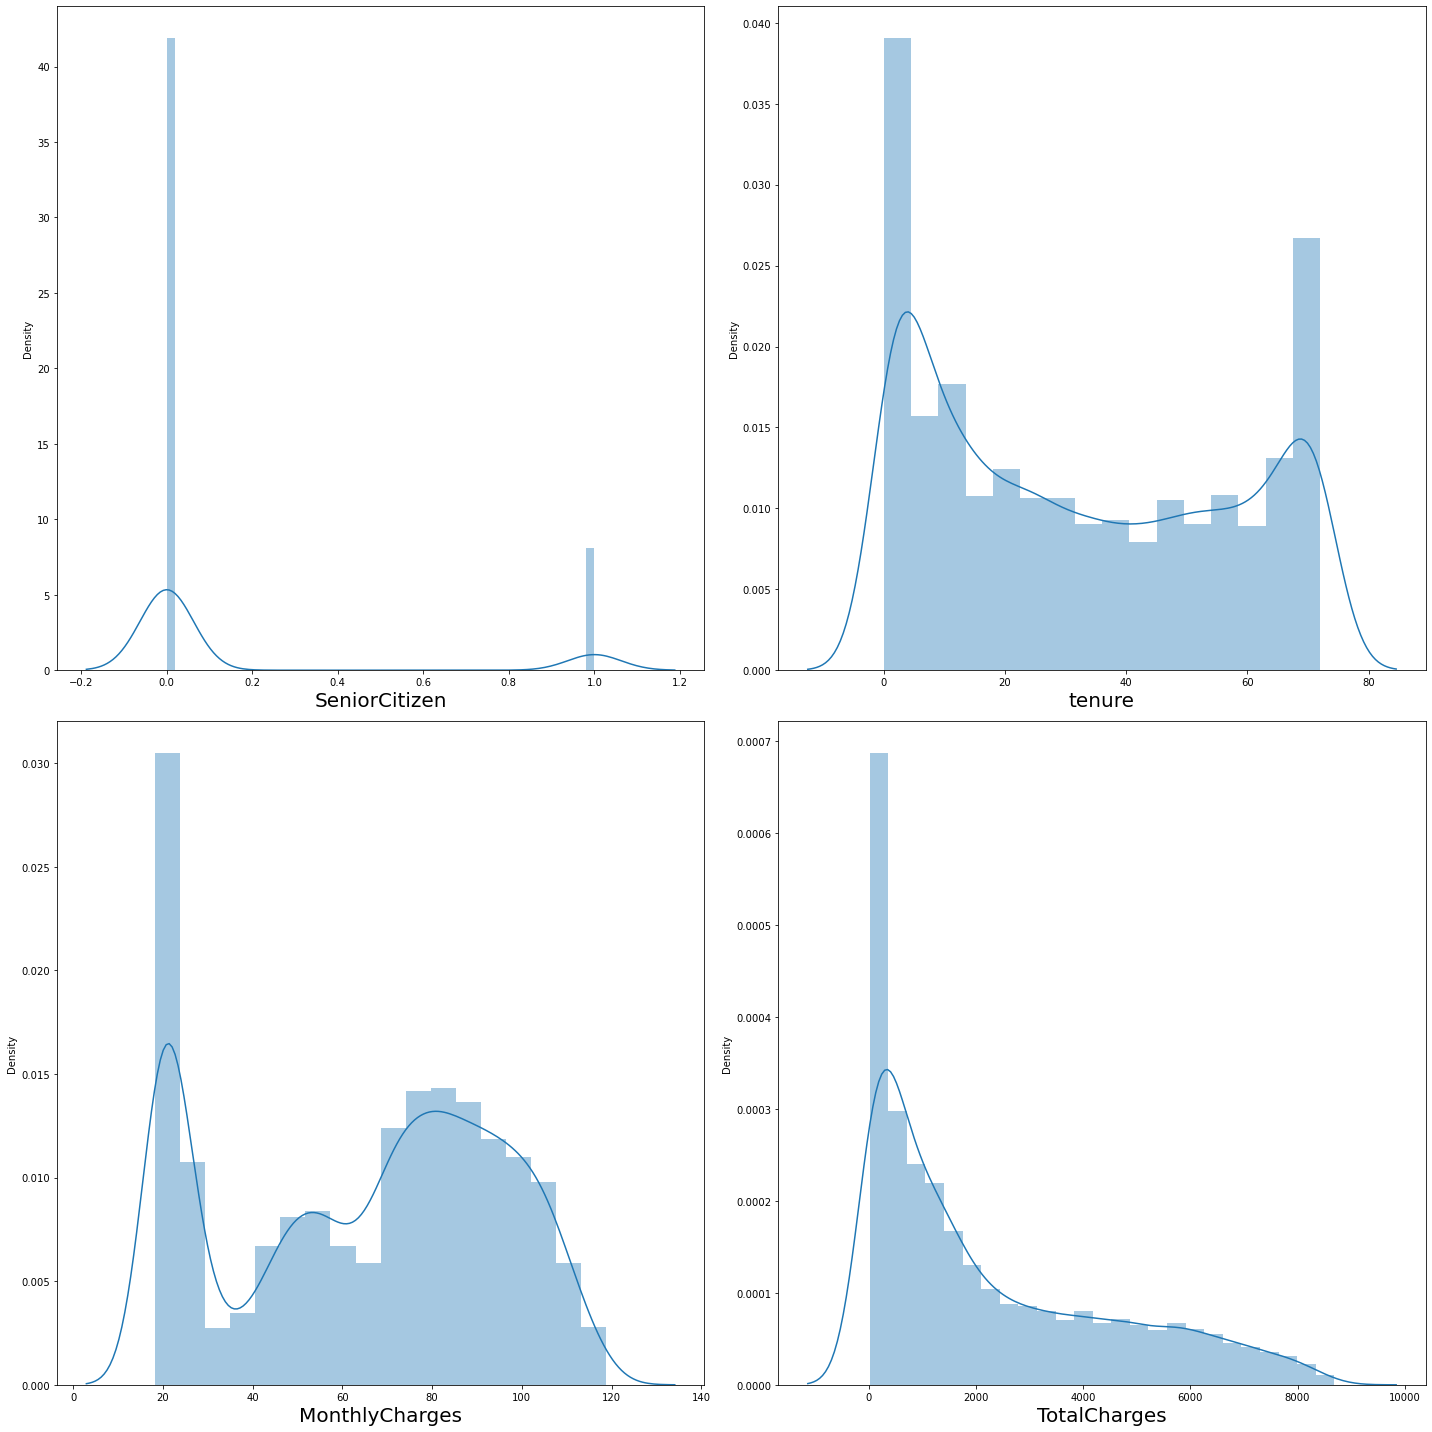

In [39]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

from the above distribution plot we can notice that data almost looks normal in all the columns except senior citizens and the data in the column total charges is skewed to the right other two columns tenure and monthly charges do not have skewness.


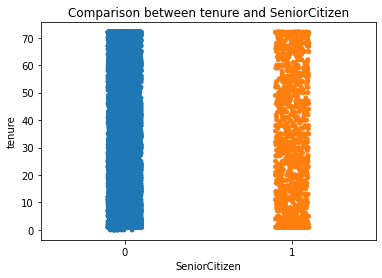

In [40]:
plt.title("Comparison between tenure and SeniorCitizen")
sns.stripplot(x='SeniorCitizen',y='tenure',data=data)
plt.show()

There is no relation between the seniorcitizen and tenure , here both features are equal in length

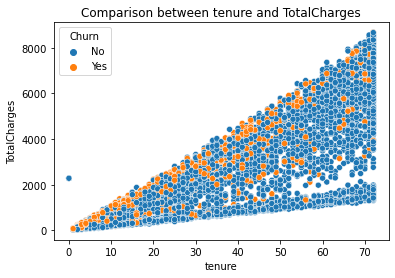

In [41]:
plt.title("Comparison between tenure and TotalCharges")
sns.scatterplot(x='tenure',y='TotalCharges',data=data,hue='Churn')
plt.show()

- Here we can notice the strong relation between the features.
- Astenure increases, total charges also increases rapidly. In the customer have low tenure services than there is high chance of churn.


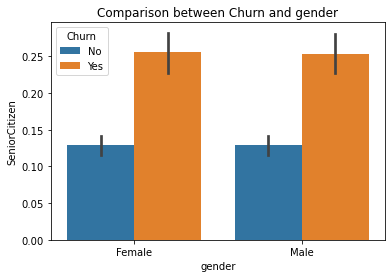

In [42]:
plt.title("Comparison between Churn and gender")
sns.barplot(x='gender',y='SeniorCitizen',data=data,hue='Churn')
plt.show()

There is no significant difference between the columns. The customer churn remains unaffected in gender and senior citizen case


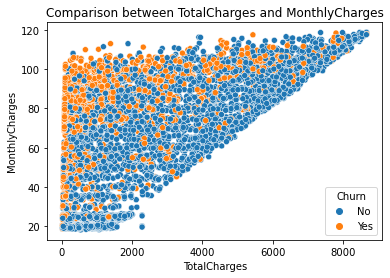

In [43]:
plt.title("Comparison between TotalCharges and MonthlyCharges")
sns.scatterplot(x='TotalCharges',y='MonthlyCharges',data=data,hue='Churn')
plt.show()

There is a linear relationship between the features. The customer with the high monthly charges have high tendency to stop the services since they have higher total charges.

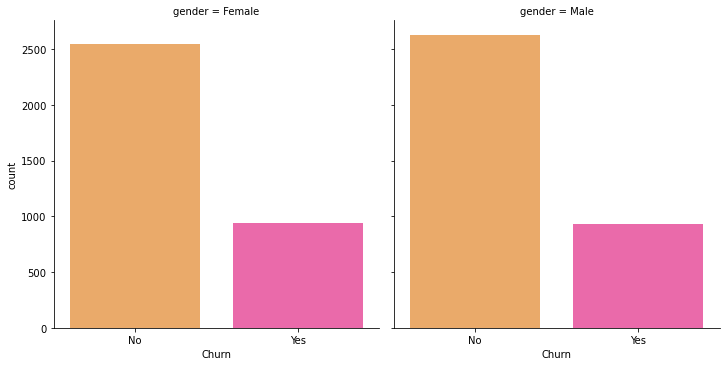

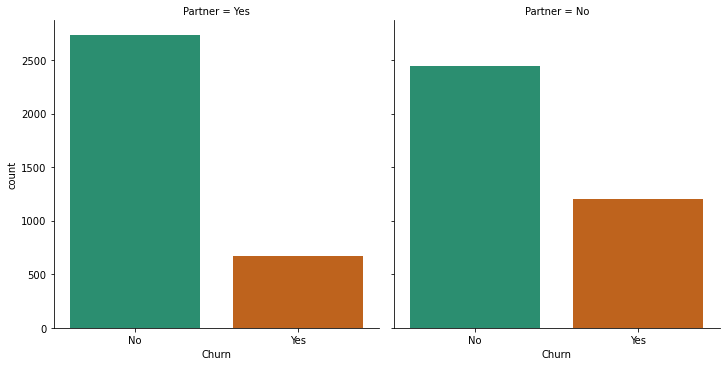

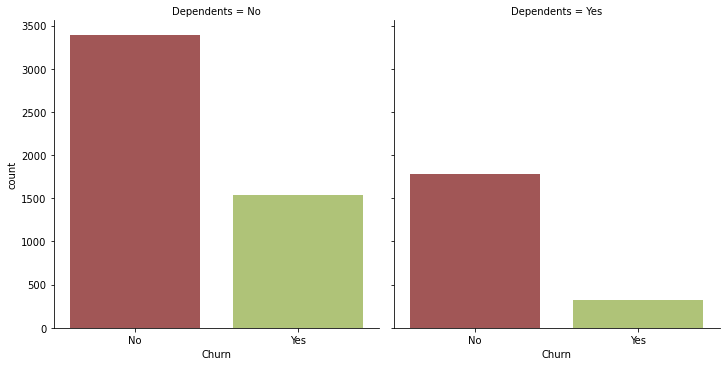

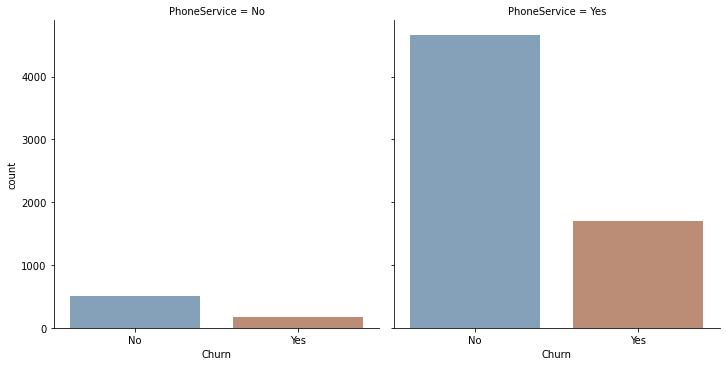

In [44]:
sns.catplot(x = 'Churn', col='gender', data=data, kind='count',palette='spring_r')

sns.catplot(x = 'Churn', col='Partner', data=data, kind='count',palette='Dark2')

sns.catplot(x = 'Churn', col='Dependents', data=data, kind='count',palette='tab20b_r')

sns.catplot(x = 'Churn', col='PhoneService', data=data, kind='count',palette='twilight_shifted')

- In the first plot we can see there is no significant difference in gender both the gender have equal churn level.

- In the second plot we can see the customers without partners have high churn rate compared to the customer with partners.

- The customers who do not have any dependency have high column rate compared to the customer who have dependants

- In the last plot we can notice the customer who have phone services have high tendency to getting churned

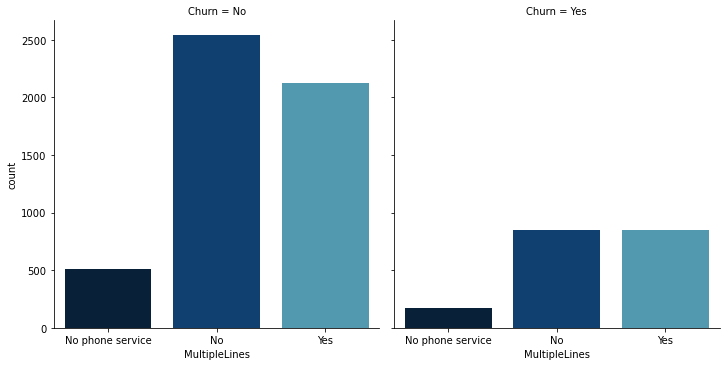

In [45]:
sns.catplot(x='MultipleLines',col='Churn',data=data,palette='ocean',kind='count')

The customers who havephone services from single line have high churn compared to the customers having phone services from multiple lines, also there are very less number of customers who do not have phone services


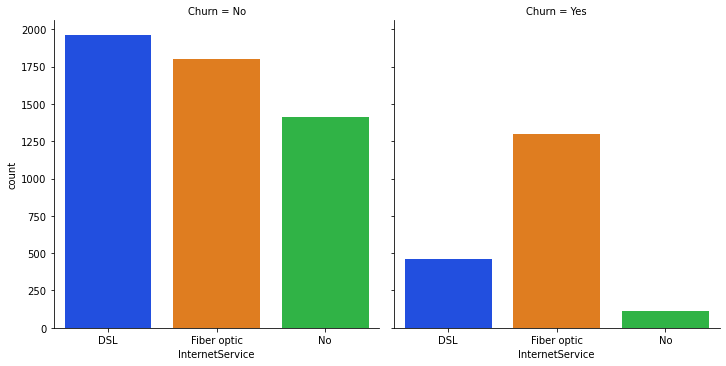

In [46]:
sns.catplot(x='InternetService',col='Churn',data=data,palette='bright',kind='count')

The issue of journeys having the customer free for fiber optic Internet service compared to other services may be this type of service is bad and need to be focused on. And the customers who own DSL service they have very less churn rate.

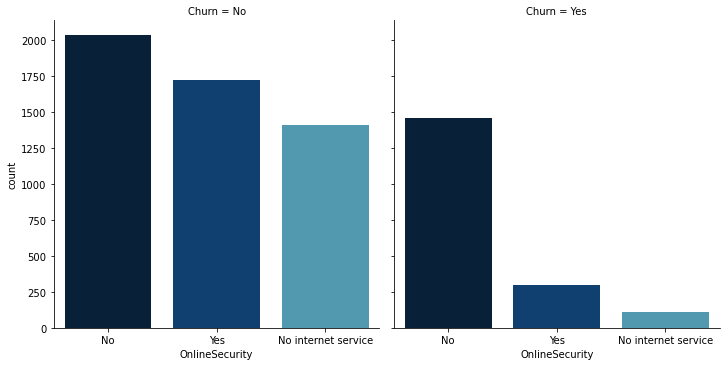

In [47]:
sns.catplot(x='OnlineSecurity',col='Churn',data=data,palette='ocean',kind='count')

The customers who have no internet service have very less churn rate and the customers who do not have online security services have high tendency to getting churned.

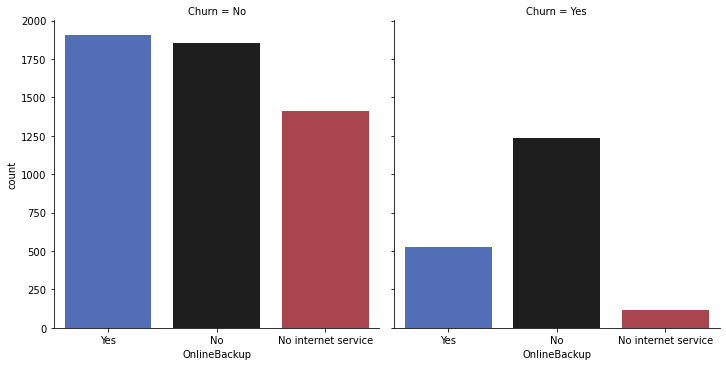

In [48]:
sns.catplot(x='OnlineBackup',col='Churn',data=data,palette='icefire',kind='count')

It is also same as in the case of online security, it is obvious that the customer who do not have Internet services they do not need to any online backup. the customer who do not have online backup services they have high churned rate


# Outliers

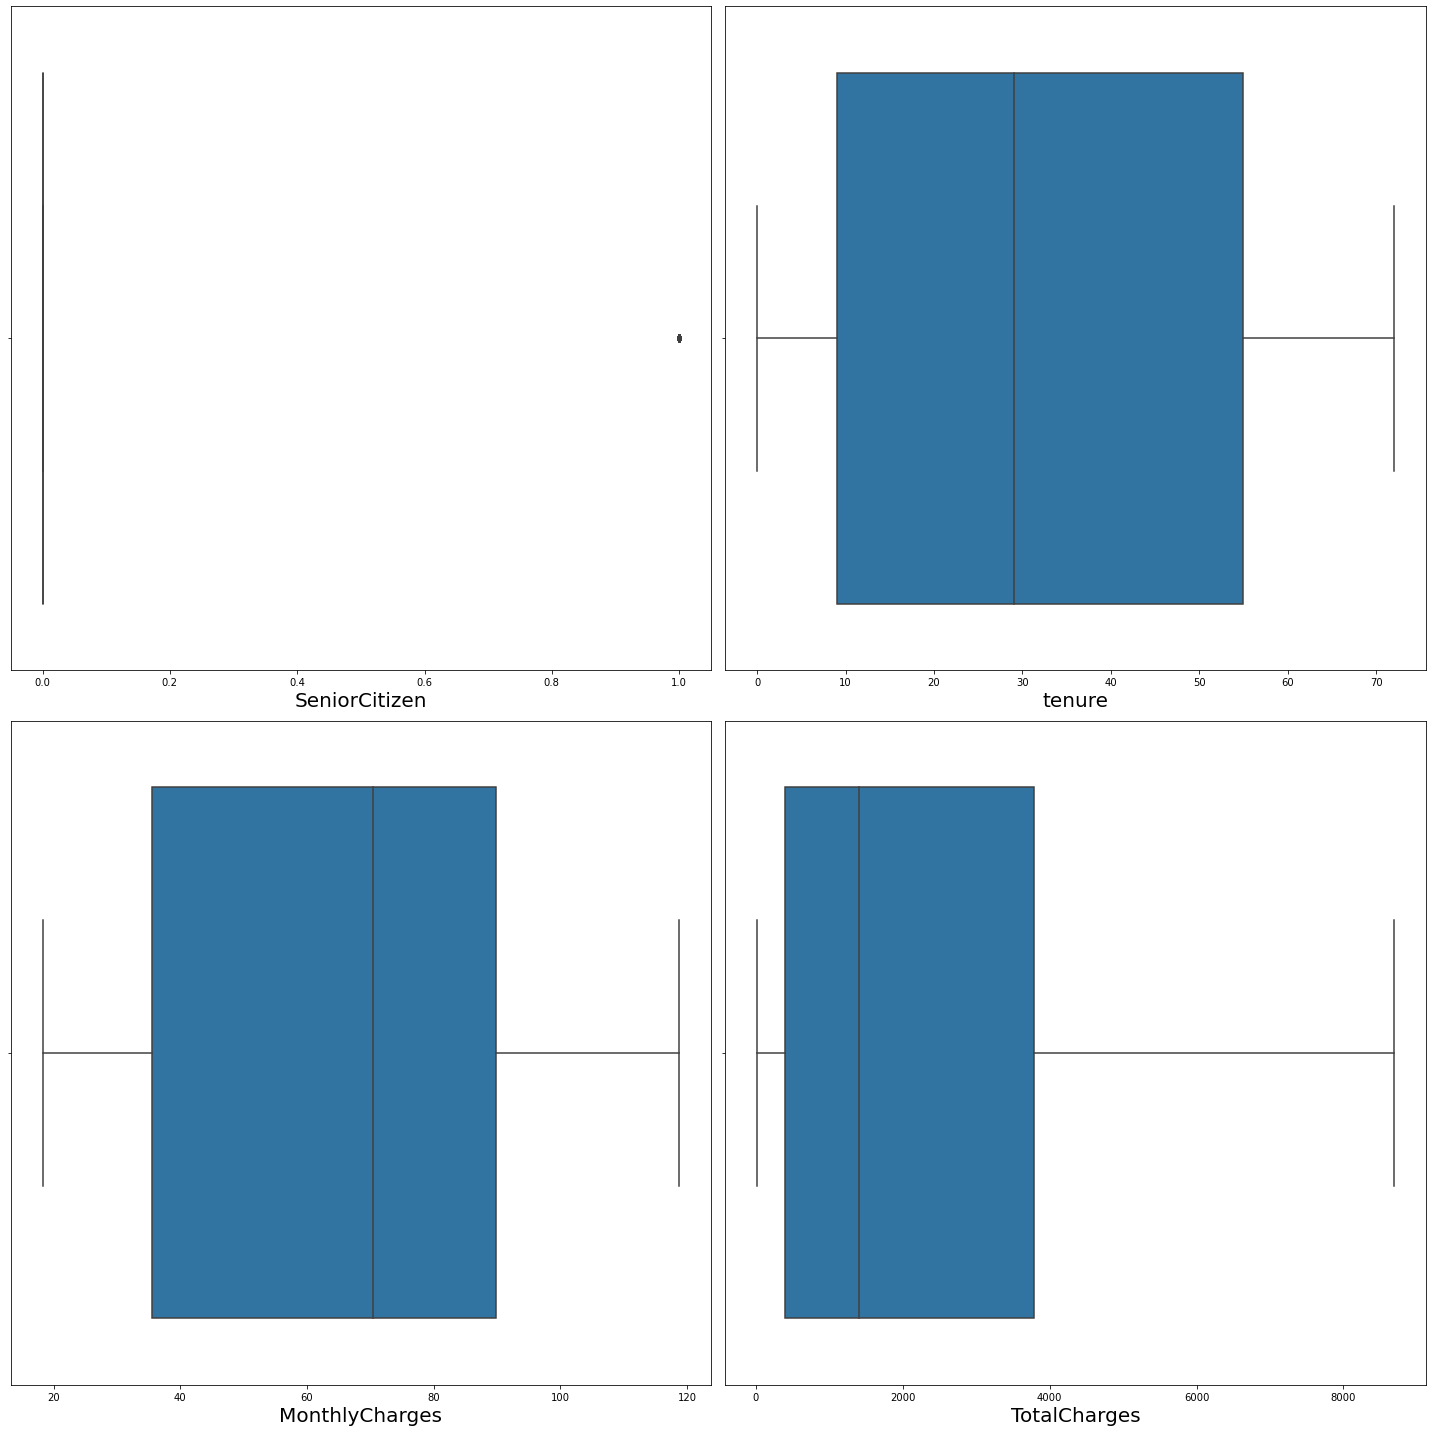

In [50]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

The column Senior citizen has outliers but it contains categorical data so no need to remove outliers.Apart from this none of the columns have outliers.

# Skewness

In [51]:
data.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

The column seniorcitizen and TotalCharges have skewness in the data.Since Seniorcitizen contain categorical data no need to remove skewness from this but TotalCharges contain continuous data lets remove skewness by using cube root method

In [52]:
# Removing skewness
data['TotalCharges'] = np.cbrt(data['TotalCharges'])

In [53]:
data.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.011168
dtype: float64

We can see the skewness has been reduced in TOtalCharges column.

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

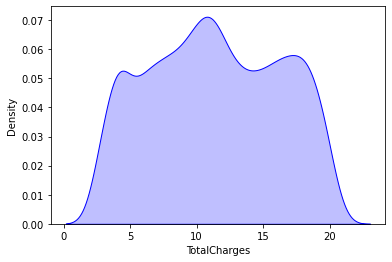

In [55]:
sns.distplot(data['TotalCharges'],color='b',kde_kws={'shade':True},hist=False)

This looks almost normal and skewness is also removed

# Encoding

In [56]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=OE.fit_transform(data[i].values.reshape(-1,1))
data
    

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,12.579230,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,19.454331,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066,1.0


We have converted categorical columns into numerical columns using ordinal encoder

In [58]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,11.358079,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,4.896177,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,11.188354,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


# Correlation

In [59]:
corr = data.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.461995,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246368,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351488,-0.195525


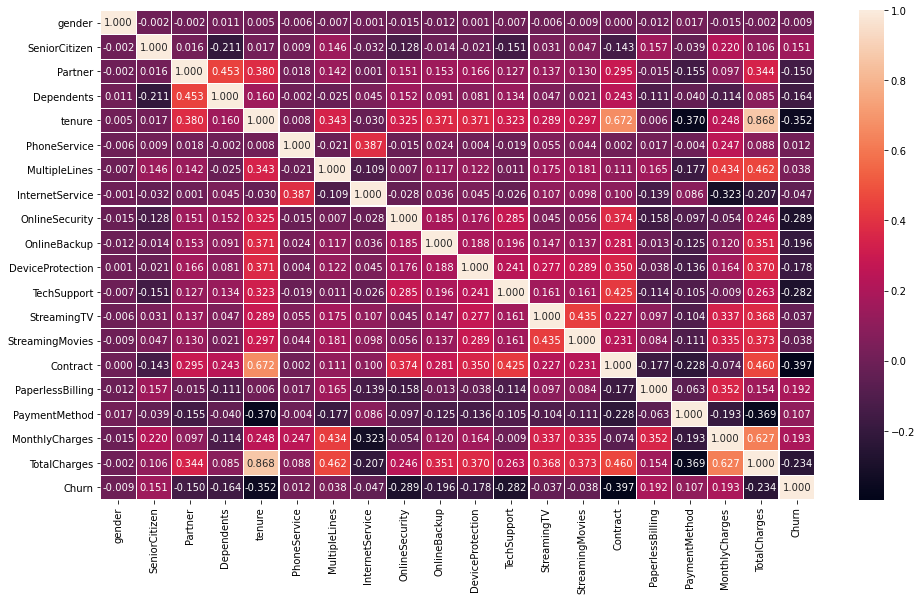

In [60]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),linewidths=.1,fmt="0.3f",annot=True)
plt.show()

This heatmap shows the correlation matrix by visualizing the data.

- There is no much positive correlation between the target and features.

- The column MonthlyCharges, PaperlessBolling, SeniorCitizeen and PaymentMethod have positive correlation with the label churn

- The label is negatively correlated with Contarct, tenure, OnlineSecurity, TechSupport, TotalCharges, DeviceProtection, OnlineBackup, Partner and Dependents.

- Also the column gender has very less correlation with the label, we can drop it

- The column TotalCharges and tenure, COntract and tenure, TOtalCharge and MonthlyCharges and many other columns have high correlation with each other 

In [62]:
corr['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.233781
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

We can see thew the positive and negative correlated features with the target

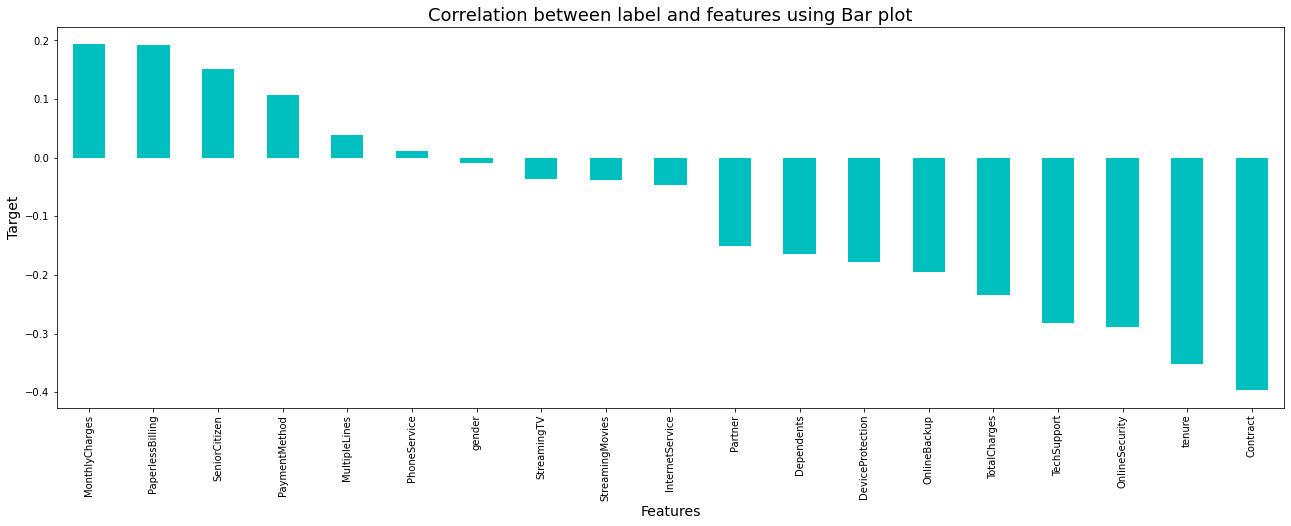

In [63]:
plt.figure(figsize=(22,7))
data.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and features using Bar plot', fontsize=18)
plt.show()


From the above plot we can notice the positive and negative correlation with the target. Here the features geander and PhoneService have very less correlation with the column.

# Separating features and label

In [76]:
x = data.drop('Churn',axis=1)
y=data['Churn']

In [77]:
x.shape

(7043, 19)

In [78]:
y.shape

(7043,)

# Standard Scalar

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942642


# VIF

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.001696,gender
1,1.149704,SeniorCitizen
2,1.462974,Partner
3,1.383950,Dependents
4,12.357252,tenure
5,1.622391,PhoneService
6,1.398354,MultipleLines
7,1.870013,InternetService
8,1.256219,OnlineSecurity
9,1.192694,OnlineBackup


By checking the VIF values we can find that the features causing multicolinearity problem. Here we can find the feature TotalCharges and tenure have VIF value greater than 10 which means they have high correlation with other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF

In [73]:
x.drop('TotalCharges',axis=1,inplace=True)

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


Multicolinearity issue solved as all the columns have value less than 10

In [79]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

# Oversampling

In [80]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [81]:
y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

Now the data is balanced. 

# Modeling

In [82]:
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = TTS(x,y,test_size=0.30,random_state=i)
    RF = RandomForestClassifier()
    RF.fit(x_train,y_train)
    pred = RF.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("The best Accuracy is", maxAccu,"at random state",maxRS)

The best Accuracy is 0.8740740740740741 at random state 40


In [83]:
x_train,x_test,y_train,y_test = TTS(x,y,test_size=0.30,random_state=40)


# Classification Algorithams

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

# RandomForestClassifier

In [85]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test,predRF))
print(confusion_matrix(y_test,predRF))
print(classification_report(y_test,predRF))

0.8721417069243156
[[1339  169]
 [ 228 1369]]
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1508
         1.0       0.89      0.86      0.87      1597

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



The accuracy of this model is 87.21%

# Logistic Regression

In [86]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7774557165861514
[[1144  364]
 [ 327 1270]]
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77      1508
         1.0       0.78      0.80      0.79      1597

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



We are getting 77.74% accuracy by this model.

# SVC

In [87]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7533011272141706
[[1066  442]
 [ 324 1273]]
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      1508
         1.0       0.74      0.80      0.77      1597

    accuracy                           0.75      3105
   macro avg       0.75      0.75      0.75      3105
weighted avg       0.75      0.75      0.75      3105



We are gettin g 75.33% accuracy by this model

# Bagging Classifier

In [90]:
bc = BaggingClassifier()
bc.fit(x_train,y_train)
predbc = bc.predict(x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

0.8534621578099839
[[1342  166]
 [ 289 1308]]
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86      1508
         1.0       0.89      0.82      0.85      1597

    accuracy                           0.85      3105
   macro avg       0.86      0.85      0.85      3105
weighted avg       0.86      0.85      0.85      3105



We are getting 85.34% accuracy by this model

# ExtraTreeClassifier

In [92]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8753623188405797
[[1330  178]
 [ 209 1388]]
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      1508
         1.0       0.89      0.87      0.88      1597

    accuracy                           0.88      3105
   macro avg       0.88      0.88      0.88      3105
weighted avg       0.88      0.88      0.88      3105



We are getting 87.53% accuracy by this model

# CrossValidation

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn

In [96]:
print("Cross_validation_Score Of RandomForestRegressor is:",cross_val_score(RF,x,y,cv=5).mean())
print("Cross_validation_Score Of LogisticRegression is:",cross_val_score(lr,x,y,cv=5).mean())
print("Cross_validation_Score Of SVC is:",cross_val_score(svc,x,y,cv=5).mean())
print("Cross_validation_Score Of BaggingClassifier is:",cross_val_score(bc,x,y,cv=5).mean())
print("Cross_validation_Score Of ExtraTreeClassifier is:",cross_val_score(ET,x,y,cv=5).mean())

Cross_validation_Score Of RandomForestRegressor is: 0.8489714044218424
Cross_validation_Score Of LogisticRegression is: 0.7673965111853611
Cross_validation_Score Of SVC is: 0.7490341666608293
Cross_validation_Score Of BaggingClassifier is: 0.838438275626163
Cross_validation_Score Of ExtraTreeClassifier is: 0.8566997522666087


ExtraTreeClassifier is our best fit model

# Hyper Parameter Tuning

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [100]:
parameters = {'criterion':['gini','entropy'],
             'random_state':[10,50,1000],
             'max_depth':[0,10,20],
             'n_jobs':[-2,-1,1],
             'n_estimators':[50,100,200,300]}

In [101]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [102]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [105]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 10}

In [110]:
Final_Model = ExtraTreesClassifier(criterion='entropy', max_depth=20,n_estimators=300,n_jobs=-2,random_state=10)
Final_Model.fit(x_train,y_train)
pred = Final_Model.predict(x_test)
print(acc*100)

85.99033816425121


The accuracy of best model is 85.99%

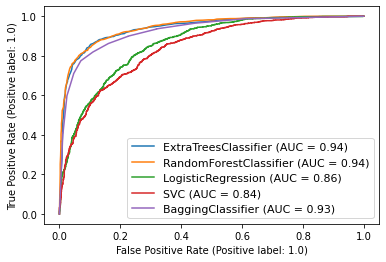

In [112]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(ET,x_test,y_test)     # ax_=Axes with confusion matrix
plot_roc_curve(RF, x_test, y_test, ax=disp.ax_)
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(bc, x_test, y_test, ax=disp.ax_)


plt.legend(prop={'size':11}, loc='lower right')
plt.show()

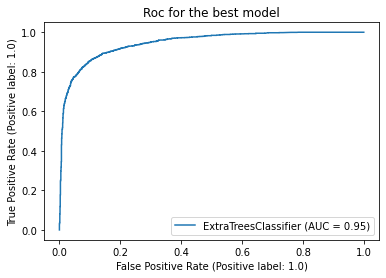

In [113]:
plot_roc_curve(Final_Model, x_test, y_test)
plt.title("Roc for the best model")
plt.show()

# Saving the model

In [114]:
import joblib
joblib.dump(Final_Model,"Telecom_Customer_Churn_Analysis.pkl")

['Telecom_Customer_Churn_Analysis.pkl']

In [115]:
model = joblib.load('Telecom_Customer_Churn_Analysis.pkl')

prediction = model.predict(x_test)
prediction 

array([0., 1., 1., ..., 1., 0., 1.])

In [116]:
a = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = a
df

,Predicted,Original
0,0.0,0.0
1,1.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,0.0
...,...,...
3100,0.0,1.0
3101,1.0,1.0
3102,1.0,1.0
3103,0.0,0.0
